# Context
blavbla

Answer the following research questions:

1. Which target muscles do I train most vs. least frequently?

2. Which months do I train the hardest (based on training volume)?

3. Which months do I train the most often?

4. Do I have a consistent workout routine? You could compare the number of workouts you do per week, or the average duration of your workouts, over time to see if you have a consistent routine.

5. Are my workouts getting easier or harder over time? You could look at metrics such as the number of reps or sets you complete, or the amount of weight you lift, to see if they are increasing or decreasing over time. This could indicate whether you are making progress or plateauing in your fitness journey.

6. Do I perform better on certain days of the week? You could compare your workout metrics (e.g., reps, sets, weight) across different days of the week to see if you tend to perform better on certain days.

7. Do I have any imbalances in my workouts? You could compare the number of sets or reps you do for different body parts to see if you are working certain muscles more than others.

8. Are there certain exercises that I struggle with? You could compare the number of reps or weight lifted for different exercises to see if there are any that you consistently have a hard time with.

9. Do I have any patterns in my workouts? For example, do you tend to do more upper body exercises on certain days of the week? Do you have a preference for certain types of exercises (e.g., free weights vs. machines)? Data visualization techniques could be helpful in identifying these patterns.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
"""
Reads the csv file into a dataframe.
After inspecting the datafile in a spreadsheet, the column "Anteckningar" has some values containing ',' which
messes with the CSV format. Therefore we set error_bad_lines to False.
"""
training_data = pd.read_csv('./my_training.csv', on_bad_lines='skip', sep=";")

# 1. Inspecting the Data

In [3]:
training_data.shape

(26622, 12)

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26622 entries, 0 to 26621
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Starttid      26622 non-null  object 
 1   Sluttid       14526 non-null  object 
 2   Övning        26621 non-null  object 
 3   Vikt          26403 non-null  float64
 4   Reps          26441 non-null  float64
 5   Anteckningar  7411 non-null   object 
 6   Kcal          5045 non-null   float64
 7   Distans       5047 non-null   float64
 8   Tid           5081 non-null   float64
 9   Kategori      26622 non-null  object 
 10  Namn          26622 non-null  object 
 11  Kroppsvikt    18742 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.4+ MB


In [5]:
training_data.describe()

,Vikt,Reps,Kcal,Distans,Tid,Kroppsvikt
count,26403.000000,26441.000000,5045.000000,5047.000000,5081.000000,18742.000000
mean,45.130578,11.113309,1.715758,0.044181,31.467034,79.549701
std,36.330284,4.204963,20.258208,0.500380,289.684051,4.432039
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,15.000000,8.000000,0.000000,0.000000,0.000000,76.800000
50%,32.500000,11.000000,0.000000,0.000000,0.000000,79.700000
75%,70.000000,14.000000,0.000000,0.000000,0.000000,82.200000
max,185.000000,60.000000,403.000000,12.650000,4555.000000,88.450000


In [6]:
training_data

,Starttid,Sluttid,Övning,Vikt,Reps,Anteckningar,Kcal,Distans,Tid,Kategori,Namn,Kroppsvikt
0,2022-11-07 11:47,2022-11-07 12:29,Incline Bench Press 30’,65.0,9.0,"Blev typ 3rir igen, glömde öka till 2rir/+1 (f...",NaN,NaN,NaN,Chest,Lunch 1,82.85
1,2022-11-07 11:47,2022-11-07 12:29,Incline Bench Press 30’,65.0,8.0,Över steg 8,NaN,NaN,NaN,Chest,Lunch 1,82.85
2,2022-11-07 11:47,2022-11-07 12:29,Incline Bench Press 30’,65.0,7.0,NaN,NaN,NaN,NaN,Chest,Lunch 1,82.85
3,2022-11-07 11:47,2022-11-07 12:29,Pull Up,0.0,12.0,+1,NaN,NaN,NaN,Back,Lunch 1,82.85
4,2022-11-07 11:47,2022-11-07 12:29,Pull Up,0.0,9.0,NaN,NaN,NaN,NaN,Back,Lunch 1,82.85
...,...,...,...,...,...,...,...,...,...,...,...,...
26617,2016-02-18 20:45,NaN,Single Cable Lateral Raise,2.5,12.0,NaN,NaN,NaN,NaN,Delts,Push,NaN
26618,2016-02-18 20:45,NaN,Single Cable Lateral Raise,2.5,12.0,NaN,NaN,NaN,NaN,Delts,Push,NaN
26619,2016-02-18 20:45,NaN,Pushdowns,32.5,12.0,NaN,NaN,NaN,NaN,Triceps,Push,NaN
26620,2016-02-18 20:45,NaN,Pushdowns,32.5,10.0,NaN,NaN,NaN,NaN,Triceps,Push,NaN


### Missing Data

TODO explain above

In [7]:
training_data.isnull().sum()

Starttid            0
Sluttid         12096
Övning              1
Vikt              219
Reps              181
Anteckningar    19211
Kcal            21577
Distans         21575
Tid             21541
Kategori            0
Namn                0
Kroppsvikt       7880
dtype: int64

In [8]:
# Calculate the % of missing data per feature
total = training_data.isnull().sum().sort_values(ascending=False)  

percent_1 = training_data.isnull().sum()/training_data.isnull().count()*100  
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)  

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])  

missing_data.loc[total > 0]

,Total,%
Kcal,21577,81.0
Distans,21575,81.0
Tid,21541,80.9
Anteckningar,19211,72.2
Sluttid,12096,45.4
Kroppsvikt,7880,29.6
Vikt,219,0.8
Reps,181,0.7
Övning,1,0.0


In [9]:
# Parse 'Starttid' column as a datetime object
training_data['parsed_date'] = pd.to_datetime(training_data['Starttid'])

# Calculate the month_year for each row
training_data['month_year'] = training_data['parsed_date'].dt.to_period('M').astype(str)

# Group by unique workout days and month_year, then count the number of days per month
overall_workouts_frequency = training_data.groupby(['month_year', pd.Grouper(key='parsed_date', freq='D')]).size().reset_index(name='daily_frequency')
overall_workouts_frequency = overall_workouts_frequency.groupby('month_year').size().reset_index(name='frequency')

# Calculate the difference between consecutive month_year values
overall_workouts_frequency['month_difference'] = overall_workouts_frequency['month_year'].apply(lambda x: pd.Period(x, freq='M')).diff().apply(lambda x: x.n if pd.notna(x) else x)

# Find the indices where the month_difference is greater than 1
gap_indices = overall_workouts_frequency.loc[overall_workouts_frequency['month_difference'] > 1].index

# Print the date ranges with gaps
print("Gaps in workout tracking:")
for idx in gap_indices:
    start_gap = overall_workouts_frequency.loc[idx - 1, 'month_year']
    end_gap = overall_workouts_frequency.loc[idx, 'month_year']
    print(f"{start_gap} to {end_gap}")

Gaps in workout tracking:
2016-07 to 2016-10
2016-11 to 2017-01
2017-07 to 2017-10


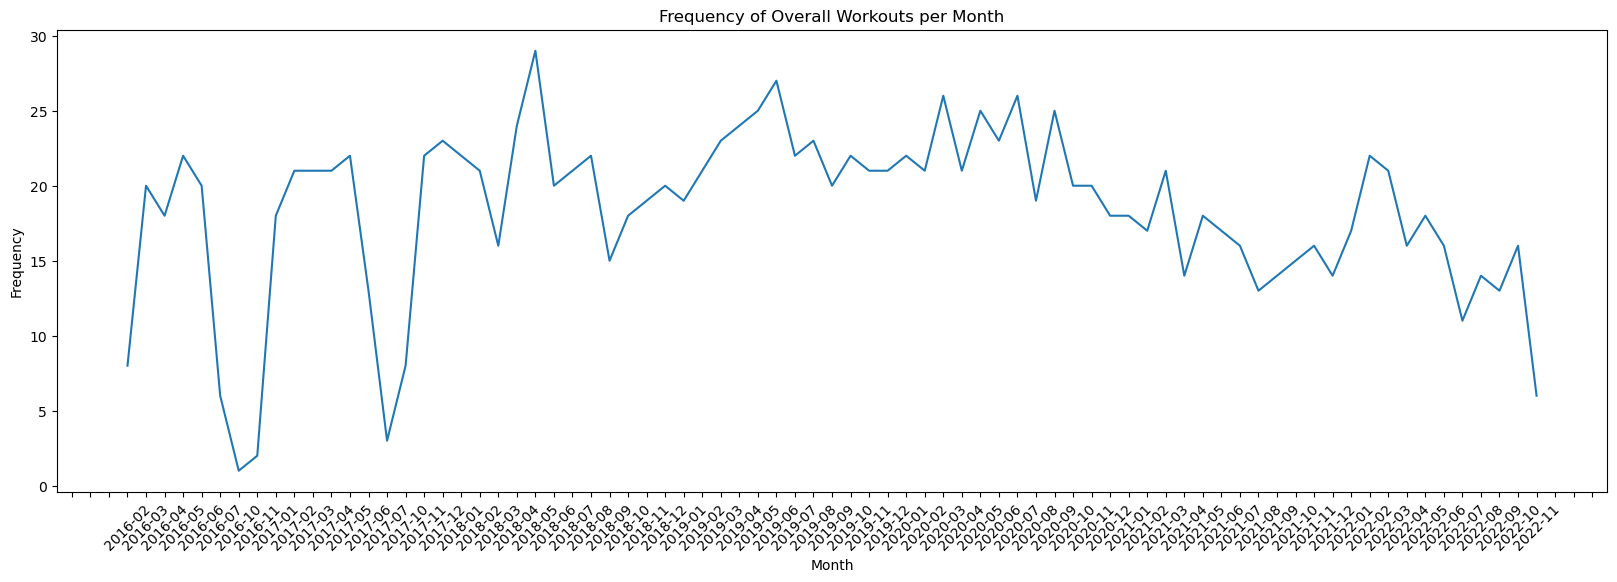

In [10]:
# Create the overall workouts frequency plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=overall_workouts_frequency, x='month_year', y='frequency')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Overall Workouts per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Configure the x-axis with a MonthLocator and AutoDateFormatter
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))

plt.show()

In [11]:
days_between_years = 2084 # Googled number of days between feb 2016 and nov 2022

# Calculate the average frequency per week (I know that I've generally trained 4-6 times per week the previous years)
average_frequency = (4 + 6) / 2

# Calculate the number of weeks between the dates
weeks_between_years = days_between_years / 7

# Calculate the expected number of workout sessions based on frequency
expected_workout_sessions = weeks_between_years * average_frequency

unique_workout_sessions = training_data['Starttid'].nunique()
missing_days = expected_workout_sessions - unique_workout_sessions
print(missing_days)

53.57142857142867


## Summary 
- Data ranges from February 2016 until November 2022
- There are a about three months in total spread out over 2016/2017 where I most likely worked out without tracking it
- Dataset contains 26622 rows and 12 features
- There's currently 1 row per set per excercise per day
- Some features have too much missing data to be useful and some features aren't useful in answering our questions
- We'll have to do some feature engineering to create some new variables in order to answer our research questions

-----

- TODO Drop unusable features
- TODO Rename columns to more descriptive names
- TODO Parse date column
- TODO Calculations of training volume
- TODO Aggregations (e.g. day, target muscle, etc.)


# 2. Cleaning & Feature Engineering

I "start over" here with a copied df to make a clear distinction from my original dataset and the dataset I'm going to "mess" with and transform. 

In [12]:
df = training_data.copy()

### Drop features

In [13]:
df.columns

Index(['Starttid', 'Sluttid', 'Övning', 'Vikt', 'Reps', 'Anteckningar', 'Kcal',
       'Distans', 'Tid', 'Kategori', 'Namn', 'Kroppsvikt', 'parsed_date',
       'month_year'],
      dtype='object')

In [14]:
# Dropping columns not needed for the analysis
df = df.drop(['Anteckningar', 'Namn', 'Sluttid', 'Kcal', 'Distans', 'Tid'], axis=1)

### Renaming 

In [15]:
df.rename(columns={'Starttid': 'date', 
                   'Kategori': 'target_muscle',
                   'Övning': 'excercise_type',
                   'Vikt': 'weight',
                   'Reps': 'reps',
                   'Kroppsvikt': 'bodyweight',
                  }, inplace=True)

In [16]:
df.head(5)

,date,excercise_type,weight,reps,target_muscle,bodyweight,parsed_date,month_year
0,2022-11-07 11:47,Incline Bench Press 30’,65.0,9.0,Chest,82.85,2022-11-07 11:47:00,2022-11
1,2022-11-07 11:47,Incline Bench Press 30’,65.0,8.0,Chest,82.85,2022-11-07 11:47:00,2022-11
2,2022-11-07 11:47,Incline Bench Press 30’,65.0,7.0,Chest,82.85,2022-11-07 11:47:00,2022-11
3,2022-11-07 11:47,Pull Up,0.0,12.0,Back,82.85,2022-11-07 11:47:00,2022-11
4,2022-11-07 11:47,Pull Up,0.0,9.0,Back,82.85,2022-11-07 11:47:00,2022-11


In [17]:
df.count()

date              26622
excercise_type    26621
weight            26403
reps              26441
target_muscle     26622
bodyweight        18742
parsed_date       26622
month_year        26622
dtype: int64

### Parsing Dates

In [18]:
# str[:10] to grab the dates without the hours:minutes
df['parsed_date'] = pd.to_datetime(df['date'].str[:10], format="%Y-%m-%d") 
df['parsed_date'].dt.month

0        11
1        11
2        11
3        11
4        11
         ..
26617     2
26618     2
26619     2
26620     2
26621     2
Name: parsed_date, Length: 26622, dtype: int64

In [19]:
# Adding year and month to each row
df['year'] = df['parsed_date'].dt.year
df['month'] = df['parsed_date'].dt.month
df['week'] = df['parsed_date'].dt.isocalendar().week

### Calculate training volume

 Training volume can be measured as number of "tough" sets or as weight x reps. 
 Since each row is one set, we'll just add a 1 for each row so it will be easy to see number of sets when aggregating.

In [20]:
df['training_volume'] = df['weight'] * df['reps']

In [21]:
# Create a new column for training volume based on number of sets (used in aggregations)
df['sets'] = 1

### Create dummy columns per target muscle

Would also like some way of measuring volume per bodypart ('Kategori') per day.
This would be easiest if I first have a way to merge the the dates of the same day but then I need to create separate columns for the "Kategori" options and merge those values for each day as well.

In [22]:
df['target_muscle'].unique()

array(['Chest', 'Back', 'Triceps', 'Biceps', 'Hamstrings',
       'Quads & Glutes', 'Delts', 'Abs', 'Calves', 'Traps', 'Forearms',
       'Cardio', 'Övriga', 'Calisthenics'], dtype=object)

In [23]:
def add_dummy_columns(dataframe, target_muscle_col):
    # Get the unique muscle groups from the target muscle column
    unique_muscles = dataframe[target_muscle_col].unique()

    # Loop through the unique muscle groups and create a new column for each
    for muscle in unique_muscles:
        # Create a new column with dummy coding for the current muscle group
        dataframe[muscle] = dataframe[target_muscle_col].apply(lambda x: 1 if x == muscle else 0)

# Usage:
add_dummy_columns(df, 'target_muscle')

In [24]:
df.columns

Index(['date', 'excercise_type', 'weight', 'reps', 'target_muscle',
       'bodyweight', 'parsed_date', 'month_year', 'year', 'month', 'week',
       'training_volume', 'sets', 'Chest', 'Back', 'Triceps', 'Biceps',
       'Hamstrings', 'Quads & Glutes', 'Delts', 'Abs', 'Calves', 'Traps',
       'Forearms', 'Cardio', 'Övriga', 'Calisthenics'],
      dtype='object')

In [25]:
# Dropping target muscles I'm not interested in
df = df.drop(['Forearms', 'Cardio', 'Övriga', 'Calisthenics'], axis=1)

### Aggregations

In [26]:
df.columns

Index(['date', 'excercise_type', 'weight', 'reps', 'target_muscle',
       'bodyweight', 'parsed_date', 'month_year', 'year', 'month', 'week',
       'training_volume', 'sets', 'Chest', 'Back', 'Triceps', 'Biceps',
       'Hamstrings', 'Quads & Glutes', 'Delts', 'Abs', 'Calves', 'Traps'],
      dtype='object')

#### Date + target muscle

In [27]:
# Filter out the target muscles you're not interested in
unwanted_muscles = ['Forearms', 'Cardio', 'Övriga', 'Calisthenics']
df_filtered = df[~df['target_muscle'].isin(unwanted_muscles)]

# Defining how the columns I'm not grouping around are gonna be aggregated
agg_functions = {'weight': 'sum', 'reps': 'sum', 'bodyweight': 'first', 'training_volume': 'sum', 'sets': 'sum'}

# Grouping by Date and Muscle group
df_aggregated = df_filtered.groupby(['parsed_date', 'target_muscle']).agg(agg_functions)
df_aggregated = df_aggregated.reset_index()

df_aggregated

,parsed_date,target_muscle,weight,reps,bodyweight,training_volume,sets
0,2016-02-18,Chest,255.0,47.0,NaN,2010.0,6
1,2016-02-18,Delts,10.0,48.0,NaN,120.0,4
2,2016-02-18,Triceps,97.5,30.0,NaN,975.0,3
3,2016-02-19,Back,75.0,60.0,NaN,750.0,6
4,2016-02-19,Biceps,37.5,30.0,NaN,375.0,3
...,...,...,...,...,...,...,...
5859,2022-11-05,Quads & Glutes,165.0,49.0,82.75,2695.0,3
5860,2022-11-07,Back,0.0,28.0,82.85,0.0,3
5861,2022-11-07,Biceps,81.0,29.0,82.85,783.0,3
5862,2022-11-07,Chest,195.0,24.0,82.85,1560.0,3


#### Year

In [28]:
df_no_date = df.drop(columns=['parsed_date'])

In [29]:
# Aggregates by year
aggregated_by_year = df_no_date.groupby(df['year']).sum()

/var/folders/t_/0sss_n354p10j1d1j41c4ml00000gn/T/ipykernel_47750/1473169917.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_by_year = df_no_date.groupby(df['year']).sum()


#### Month

In [30]:
# Aggregates by month, doesn't account for the year
aggregated_by_month = df_no_date.groupby(df['month']).sum()

/var/folders/t_/0sss_n354p10j1d1j41c4ml00000gn/T/ipykernel_47750/1665091176.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_by_month = df_no_date.groupby(df['month']).sum()


In [31]:
# Aggregates by year, month, and target muscle

# Filter out the target muscles you're not interested in
unwanted_muscles = ['Forearms', 'Cardio', 'Övriga', 'Calisthenics']
df_filtered = df[~df['target_muscle'].isin(unwanted_muscles)]

# Add the month_year column
df_filtered['month_year'] = df_filtered['parsed_date'].dt.to_period('M')

# Defining how the columns I'm not grouping around are gonna be aggregated
agg_functions = {'weight': 'sum', 'reps': 'sum', 'bodyweight': 'first', 'training_volume': 'sum', 'sets': 'sum'}

# Grouping by month_year and target_muscle
aggregated_by_month_year = df_filtered.groupby(['month_year', 'target_muscle']).agg(agg_functions)
aggregated_by_month_year = aggregated_by_month_year.reset_index()

/var/folders/t_/0sss_n354p10j1d1j41c4ml00000gn/T/ipykernel_47750/1809866097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_year'] = df_filtered['parsed_date'].dt.to_period('M')


In [32]:
aggregated_by_month_year

,month_year,target_muscle,weight,reps,bodyweight,training_volume,sets
0,2016-02,Back,1032.5,196.0,NaN,7382.5,25
1,2016-02,Biceps,142.5,140.0,NaN,1625.0,12
2,2016-02,Calves,520.0,75.0,NaN,4875.0,8
3,2016-02,Chest,1296.9,205.0,NaN,8533.9,27
4,2016-02,Delts,479.5,458.0,NaN,4387.0,40
...,...,...,...,...,...,...,...
645,2022-11,Chest,562.5,101.0,82.85,4818.5,12
646,2022-11,Delts,102.0,106.0,82.40,1093.0,9
647,2022-11,Hamstrings,385.0,74.0,82.75,3975.0,6
648,2022-11,Quads & Glutes,721.5,107.0,82.75,8074.5,9


#### Week

In [33]:
# Aggregates by week, doesn't account for the year
aggregated_by_week = df_no_date.groupby(df['week']).sum()

/var/folders/t_/0sss_n354p10j1d1j41c4ml00000gn/T/ipykernel_47750/3713197922.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_by_week = df_no_date.groupby(df['week']).sum()


# 3. Analysis (RQs)

## RQ1: Which target muscles do I train most frequently?

TODO INTRO

There's no meaning looking at least frequently because I already know I haven't trained muscles such as traps and abs much at all, so they would end up the least trained.

In [34]:
df_aggregated['target_muscle'].unique()

array(['Chest', 'Delts', 'Triceps', 'Back', 'Biceps', 'Calves',
       'Quads & Glutes', 'Abs', 'Hamstrings', 'Traps'], dtype=object)

In [35]:
df_aggregated['target_muscle'].value_counts()

Back              894
Delts             872
Biceps            830
Chest             785
Triceps           666
Quads & Glutes    616
Hamstrings        483
Calves            437
Abs               191
Traps              90
Name: target_muscle, dtype: int64

Back and delts are the most frequently trained muscles while abs and traps are trained least frequently. I'd also like to see whether there are any trends regarding these frequencies (seasonality, increased/decreased over time).

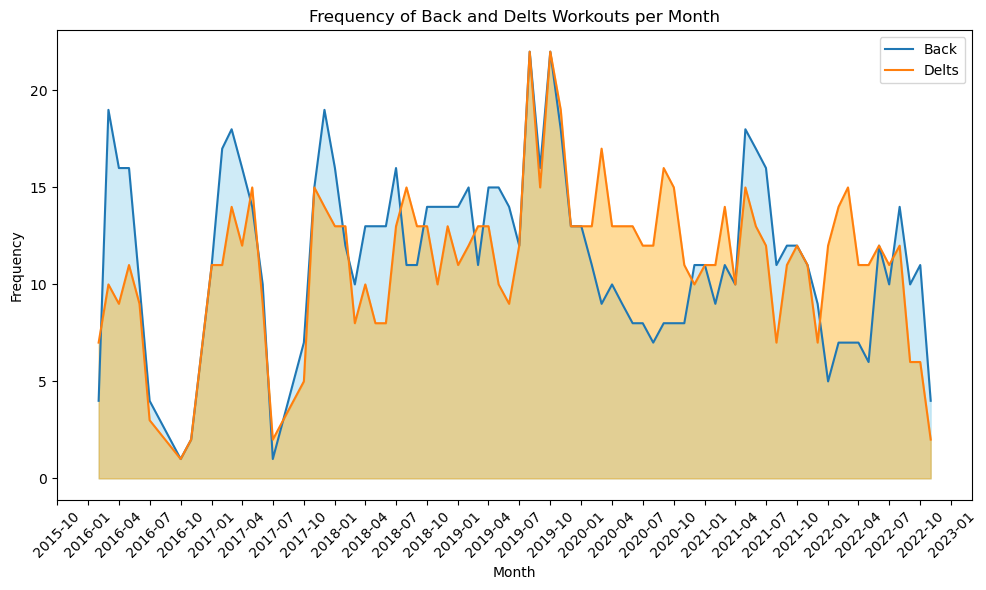

In [60]:
# Import necessary modules
import matplotlib.dates as mdates

# Plot the area chart using Matplotlib and Seaborn
plt.figure(figsize=(10, 6))

# Convert 'month_year' to datetime
back_workouts_frequency['month_year'] = pd.to_datetime(back_workouts_frequency['month_year'])
delts_workouts_frequency['month_year'] = pd.to_datetime(delts_workouts_frequency['month_year'])

# Sort data
back_workouts_frequency.sort_values('month_year', inplace=True)
delts_workouts_frequency.sort_values('month_year', inplace=True)

# Plot data
plt.plot(back_workouts_frequency['month_year'], back_workouts_frequency['frequency'], label='Back')
plt.fill_between(back_workouts_frequency['month_year'], back_workouts_frequency['frequency'], color='skyblue', alpha=0.4)

plt.plot(delts_workouts_frequency['month_year'], delts_workouts_frequency['frequency'], label='Delts')
plt.fill_between(delts_workouts_frequency['month_year'], delts_workouts_frequency['frequency'], color='orange', alpha=0.4)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-axis intervals to 3 months

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Back and Delts Workouts per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

TODO more text

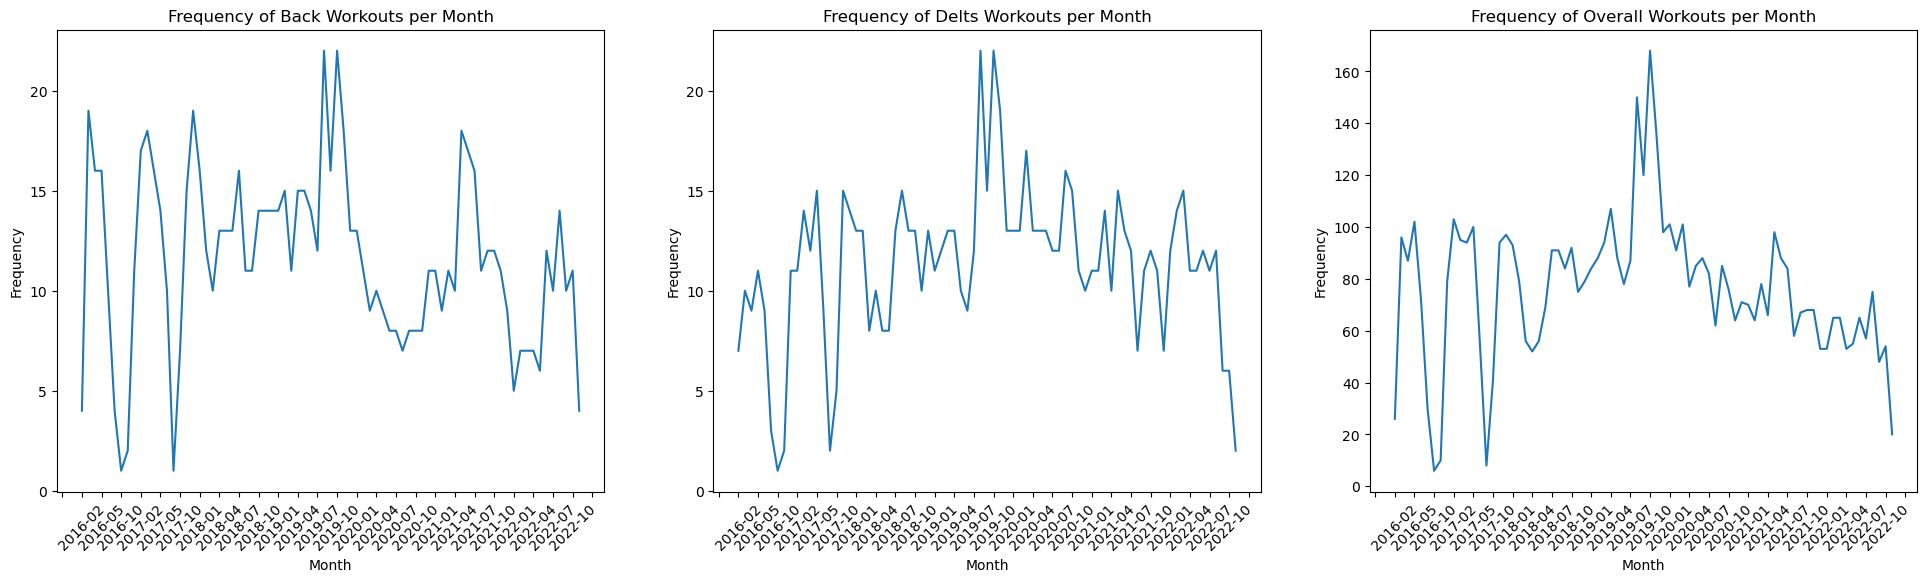

In [37]:
# Count the frequency of workouts per month
back_workouts_frequency = back_workouts.groupby('month_year').size().reset_index(name='frequency')
delts_workouts_frequency = delts_workouts.groupby('month_year').size().reset_index(name='frequency')

# Extract the month and year for the overall dataset and count the frequency of workouts per month
df_aggregated.loc[:, 'month_year'] = df_aggregated['parsed_date'].dt.to_period('M').astype(str)
overall_workouts_frequency = df_aggregated.groupby('month_year').size().reset_index(name='frequency')

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Plot the line graph for back workouts frequency on the first subplot
sns.lineplot(ax=axes[0], data=back_workouts_frequency, x='month_year', y='frequency')
axes[0].set_title('Frequency of Back Workouts per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Frequency')
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(base=3))
axes[0].tick_params(axis='x', rotation=45)

# Plot the line graph for delts workouts frequency on the second subplot
sns.lineplot(ax=axes[1], data=delts_workouts_frequency, x='month_year', y='frequency')
axes[1].set_title('Frequency of Delts Workouts per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Frequency')
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(base=3))
axes[1].tick_params(axis='x', rotation=45)

# Plot the line graph for overall workouts frequency on the third subplot
sns.lineplot(ax=axes[2], data=overall_workouts_frequency, x='month_year', y='frequency')
axes[2].set_title('Frequency of Overall Workouts per Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Frequency')
axes[2].xaxis.set_major_locator(ticker.MultipleLocator(base=3))
axes[2].tick_params(axis='x', rotation=45)

plt.show()


Conclusion:
- I've trained back followed by delts the most amounts of times during this time period.
- Generally, they followed the same pattern of frequency as the overall dataset, although we can see that the frequency of back workouts has been somewhat more volatile. 

## RQ2: Which months do I train the hardest (based on training volume)?

## Training volume per month overall

In [38]:
training_volume_per_month = aggregated_by_month['training_volume']
training_volume_per_month

month
1      997912.50
2     1235601.90
3     1295550.55
4      999257.50
5     1138599.90
6      975758.00
7      934520.50
8      763694.00
9      664489.20
10     820825.60
11     964096.25
12     906333.25
Name: training_volume, dtype: float64

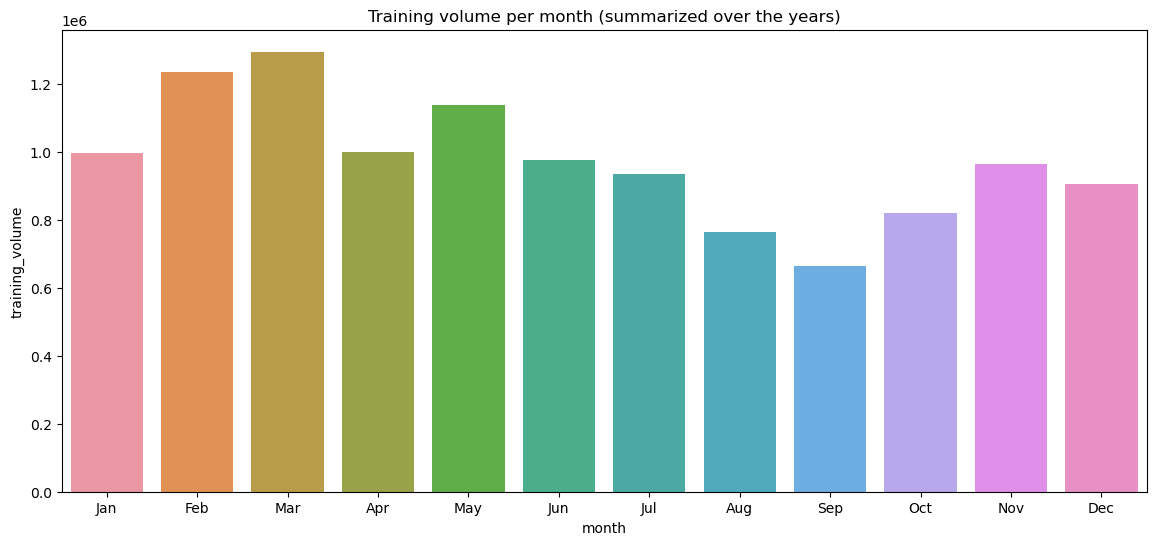

In [39]:
# Plot number of sets per month
plt.figure(figsize=(14,6))
ax = sns.barplot(x=training_volume_per_month.index, y=training_volume_per_month)
ax.set_title("Training volume per month (summarized over the years)")
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

We'll also check for the number of sets (number of sets is a popular proxy for training volume which in some situations is even more telling) per month.

In [40]:
sets_per_month = aggregated_by_month['sets']
print(sets_per_month)

month
1     2302
2     2776
3     2938
4     2220
5     2717
6     2274
7     2058
8     1761
9     1489
10    1917
11    2178
12    1992
Name: sets, dtype: int64


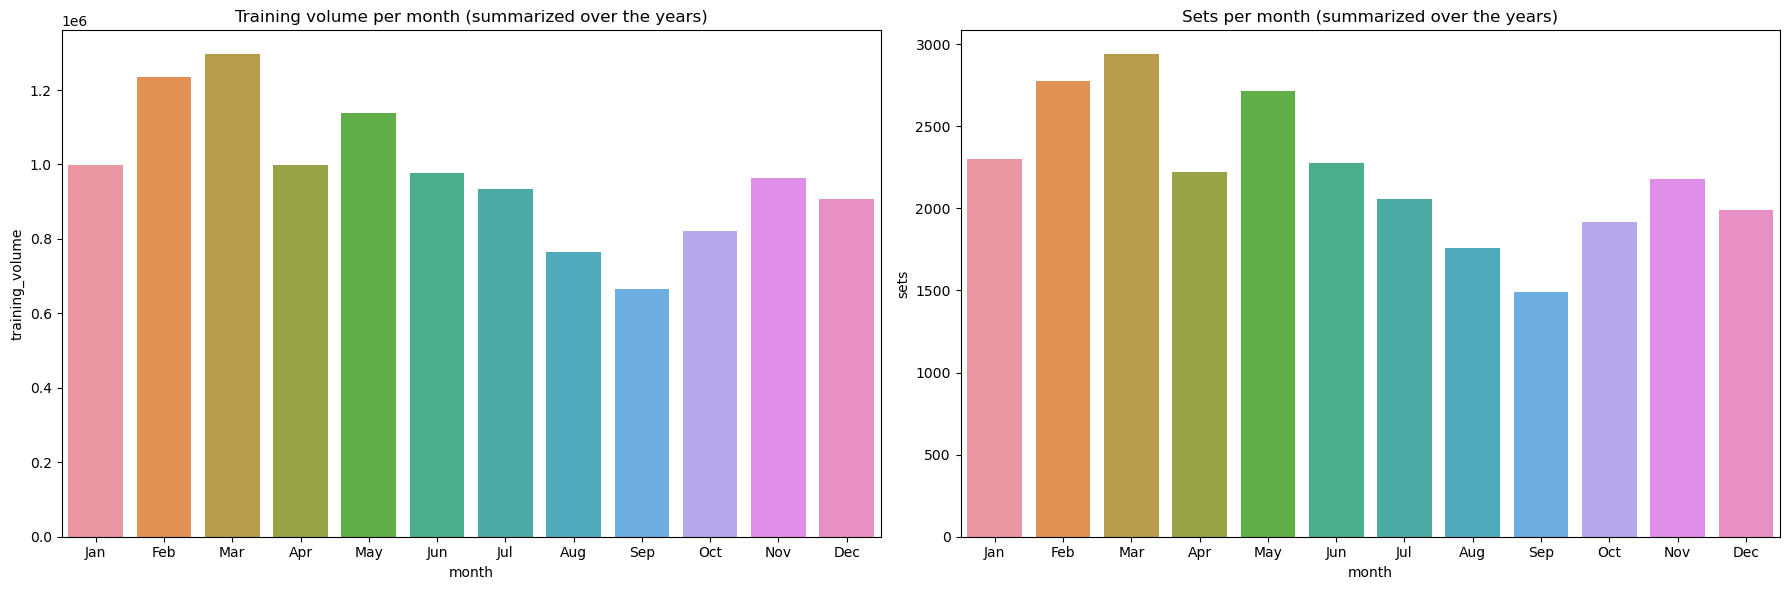

In [41]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Training volume per month
ax1 = axes[0]
sns.barplot(x=training_volume_per_month.index, y=training_volume_per_month, ax=ax1)
ax1.set_title("Training volume per month (summarized over the years)")
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# Plot 2: Sets per month
ax2 = axes[1]
sns.barplot(x=sets_per_month.index, y=sets_per_month, ax=ax2)
ax2.set_title("Sets per month (summarized over the years)")
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

As we can see, the plots are nearly identical. We'll continue with the training volume variable for the remaining analysis regarding volume.

## Training volume per month per year

I'd also like to examine the training volume per month per year to see whether there are any anual differences. To do that, I'l create a grid to plot the yearly training volumes per month side-by-side.

Could it be affected by the periods in which I didn't track? Remember from the beginning of the analysis, that there were some periods in which workouts weren't tracked.

Gaps in workout tracking:
- 2016-08 to 2016-09
- 2016-12
- 2017-08 to 2017-09


In [42]:
# Creating a dictionary which stores the workout data per year
workout_data_per_year = {}

for year in range(2016, 2023):
    workout_data_per_year[year] = df.loc[df['year'] == year]
     

/Users/ossianhempel/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


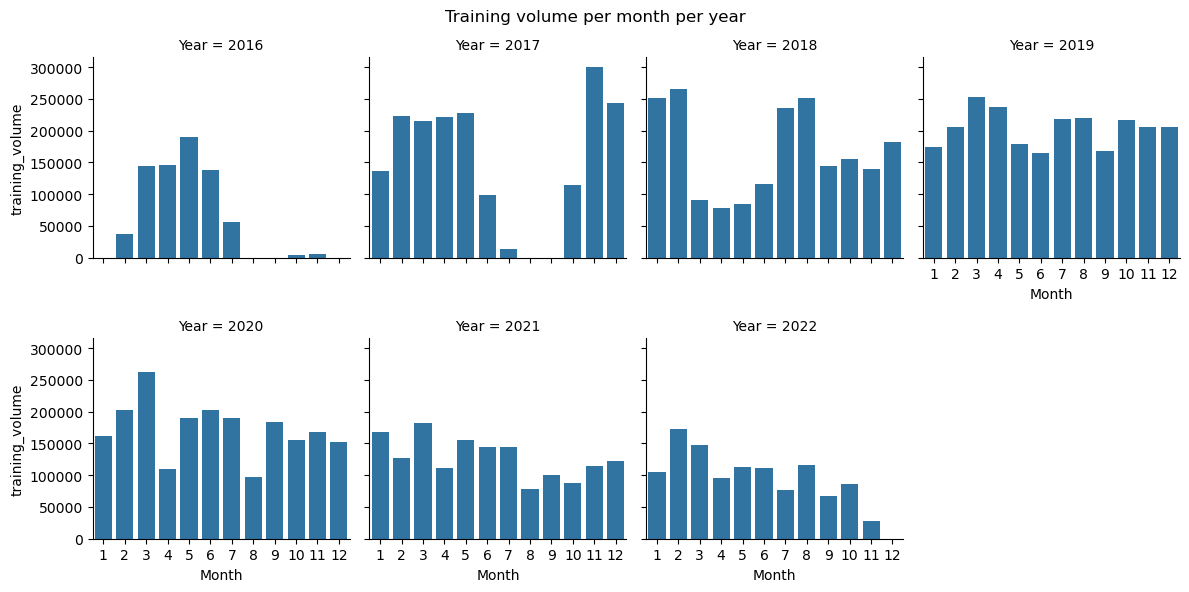

In [55]:
# Create a DataFrame with all combinations of Year and Month
all_years_months = pd.MultiIndex.from_product([range(2016, 2023), range(1, 13)], names=['Year', 'Month'])

# Reindex training_volume_per_year_month and fill NaN values with 0
training_volume_per_year_month = training_volume_per_year_month.set_index(['Year', 'Month']).reindex(all_years_months).fillna(0).reset_index()

# Create a FacetGrid
g = sns.FacetGrid(training_volume_per_year_month, col="Year", col_wrap=4, height=3)

# Map a barplot onto each facet
g.map(sns.barplot, "Month", "training_volume")

# Increase the space between plots
plt.subplots_adjust(hspace=0.4)

# Add a title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Training volume per month per year')

plt.show()


As we can see, in line with what I reported in the beginning of this analyses, there are periods during 2016 and 2017 were I didn't use the workout tracker. Thus, there's missing data during these two years. If we'd only want to use years with full data, then 2018-2021 are most suitable since other months don't have full data.

Let's repeat the initial analysis of training data per month including only the year with complete data, lets use averages instead of accumulated volumes:

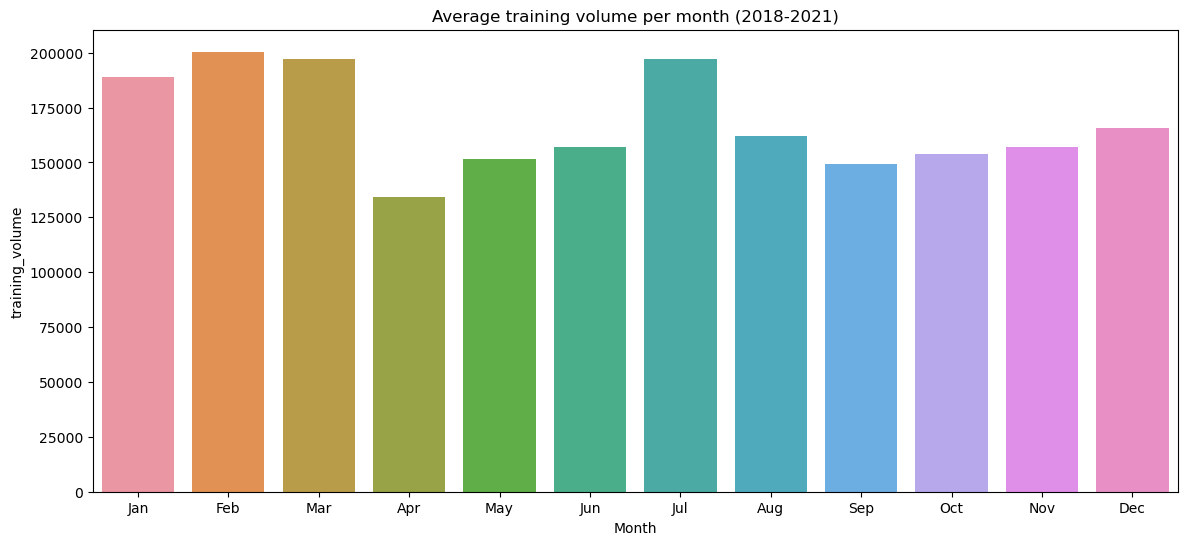

In [58]:
# Filter training_volume_per_year_month for the years 2018-2021
training_volume_per_month_2018_2021 = training_volume_per_year_month[(training_volume_per_year_month['Year'] >= 2018) & (training_volume_per_year_month['Year'] <= 2021)]

# Calculate average training volume per month over the years 2018-2021
training_volume_per_month_2018_2021 = training_volume_per_month_2018_2021.groupby('Month')['training_volume'].mean()

# Plot average training volume per month
plt.figure(figsize=(14,6))
ax = sns.barplot(x=training_volume_per_month_2018_2021.index, y=training_volume_per_month_2018_2021)
ax.set_title("Average training volume per month (2018-2021)")
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Conclusion:


**Conclusion:**
- I've had the highest training volumes during February/March and in July. These peaks correspond to the end of my primary phases: massing (building muscle) and cutting (loosing bodyfat).

- The volume drops off significantly in April most likely due to me doing a longer deload phase after a long massing phase and before the cutting phase.

- After April, the training volume gradually build up again during the cutting phase and tops out in July (which is when I stop cutting usually).

- After the peak of the cutting phase, volume drops slightly again (similar pattern as from the peak of massing) before gradually building up again during the winter season massing phase.

- Overall, there's less volatility in training volume when dropping the years with missing data.

## RQ3: Which months do I train most frequently?

I'll just use the months with complete data in the following analyses: 2018-2021.

In [67]:
# List of keys to be removed
keys_to_keep = [2018, 2019, 2020, 2021]

workout_data_per_year_full_data = {key: workout_data_per_year[key] for key in keys_to_keep}

In [70]:
workout_data_per_year_full_data.keys()

dict_keys([2018, 2019, 2020, 2021])

In [ ]:
def number_of_workouts(df):
    unique_sessions = df['parsed_dates'].unique()
    number_of_workouts = len(unique_sessions)
    return number_of_workouts

In [ ]:
# Number of workouts recored per year
for year in range(2016, 2023):
    print(number_of_workouts(workout_data_per_year[year])) 

In [ ]:
# Number of sessions per month
workouts_per_month = training_data.groupby([training_data['month'], training_data['parsed_dates']]).count().groupby('month').size()

workouts_per_month

In [ ]:
# Plot the number of sessions per month
sns.barplot(x=workouts_per_month.index, y=workouts_per_month)
plt.title("Number of workouts per month (2016-2022)")
plt.figure(figsize=(14,6))

Conclusion: 

### Do I have a consistent workout routine?

You could compare the number of workouts you do per week, or the average duration of your workouts, over time to see if you have a consistent routine.

In [ ]:
# Include training data between 2017-2021 as those years have full years of data
training_data_complete_years = training_data.loc[(training_data['year'] >= 2017) & (training_data['year'] <= 2021)]
training_data_complete_years.head()

In [ ]:
agg_data = training_data_complete_years.groupby(training_data_complete_years['week'], as_index=False).size()
total_workouts = agg_data.sum()
avg_workouts_per_week = total_workouts / (training_data_complete_years['week'].nunique())

In [ ]:
# "Datum" becomes the number of unique session as it represents unique days (each day is a session)
agg_data = training_data_complete_years.groupby(['week']).nunique()
agg_data.head()

In [ ]:
# Create an column for average workouts per week by splitting by the number of years of accumulated data (5)
agg_data['Avg. num workouts per week'] = agg_data['Datum'] / 5

In [ ]:
agg_data.head()

In [ ]:
# Combine the weekly workout sessions per week over the years to produce the average sessions per week
x_ticks = [i for i in range(0, 60, 5)]
plt.figure(figsize=(14,6))
plt.title("Average Weekly Number of Workout Sessions Between 2017-2021")
plt.xticks(x_ticks)
plt.grid()
sns.lineplot(x=agg_data.index, y=agg_data['Avg. num workouts per week'])

In [ ]:
grouped = training_data_complete_years.groupby(['year', 'week'])['Datum'].nunique().reset_index()
x_ticks = [i for i in range(0, 60, 5)]


grouped['Avg. num workouts per week'] = (grouped['Datum'] / grouped['week'].nunique())

plt.figure(figsize=(14, 8))
for year, group in grouped.groupby('year'):
    group['Datum'] = group['Datum'] 
    sns.lineplot(x=group['week'], y=group['Datum'], label=str(year))
    
plt.xlabel('Week')
plt.ylabel('Number of workouts') 
plt.xticks(x_ticks)
plt.grid()
plt.title('Number of weekly workout sessions by year')
plt.legend()
plt.show()

In [ ]:
# TODO Get descriptive stats for my workout sessions (mean, range, std. dev, median)
mean = (agg_data['Avg. num workouts per week'].sum()) / 5
mean

Conclusion: My tr